# Análise descritiva do conjunto de redações (Essay-br)
  



In [ ]:
# Instalar vaderSentiment
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
# Importar pacotes e bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from PIL import Image
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Montar Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ler os dados
essay = pd.read_csv('/content/drive/MyDrive/essay-br.csv')
prompts = pd.read_csv('/content/drive/MyDrive/prompts.csv')

## Análise Exploratória

## Conjunto de redações (essay)


Para introduzir a análise, foram inspecionadas as primeiras entradas e a estrutura do conjunto de dados. O conjunto de dados 'essay' apresenta um total de 4570 registros distribuídos em 5 colunas: prompt, title, essay, competence, e score. Entre as colunas apenas 'title' apresenta valores ausentes, já que no ENEM o título da redação não é obrigatório, totalizando 14,97% de valores faltantes.

In [ ]:
essay.head()

,prompt,title,essay,competence,score
0,21,A greve dos caminhoneiros e a malha ferroviária,['A grande importância dos caminhoneiros para ...,"[160, 160, 120, 120, 120]",680
1,23,"Vossa excelência Senador M. M.,",['O senhor e eu já estamos cientes do projeto ...,"[160, 160, 120, 120, 120]",680
2,39,A validade do impeachment,['É de conhecimento geral dos brasileiros o qu...,"[120, 160, 160, 160, 120]",720
3,26,Podemos perceber que a sociedade brasileira,['Podemos perceber que a sociedade brasileira ...,"[120, 120, 80, 120, 120]",560
4,4,Comenta-se que o ex-presidente Lula,['Comenta-se que o ex presidente Lula ex-presi...,"[0, 0, 0, 0, 0]",0


In [ ]:
essay.shape

(4570, 5)

In [ ]:
essay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4570 entries, 0 to 4569
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   prompt      4570 non-null   int64 
 1   title       3886 non-null   object
 2   essay       4570 non-null   object
 3   competence  4570 non-null   object
 4   score       4570 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 178.6+ KB


In [ ]:
essay.isnull().sum()

,0
prompt,0
title,684
essay,0
competence,0
score,0


In [ ]:
missing_title = essay['title'].isnull().mean() * 100
print(f"Percentual de valores ausentes na coluna 'title': {missing_title:.2f}%")

Percentual de valores ausentes na coluna 'title': 14.97%


## Conjunto de temas das redações (prompts)

O conjunto 'prompt' contém 86 registros distribuídos em duas colunas: id e description. Cada entrada representa um tema específico com uma descrição que contextualiza o assunto abordado nas redações, sendo 'id' o valor correspondente a coluna 'prompt' no conjunto 'essay'.

In [ ]:
prompts.head()

,id,description
0,0,"['No Carnaval de 2020, veio novamente à tona u..."
1,1,['O número de pessoas desempregadas no mundo d...
2,2,"['Ao longo dos últimos dez anos, o papel do ST..."
3,3,"['Com o avanço da biotecnologia, da engenharia..."
4,4,"['No início deste mês de novembro, o Supremo T..."


In [ ]:
prompts.shape

(86, 2)

## Análise das Notas

### Análise Descritiva das Notas por Competência

Para realizar uma análise individual das notas de cada competência, a coluna 'competence' foi separada em colunas distintas para cada competência, nomeadas C1, C2, C3, C4 e C5, que representam, respectivamente, Língua Portuguesa, Tema e Gênero, Coerência, Coesão e Proposta de Intervenção. Essas colunas foram então incorporadas ao conjunto de dados original, permitindo a análise detalhada de cada competência.  

A análise descritiva das notas identifica que as competência 'Coerência' (C3) e 'Proposta de intervenção' (C5) apresentam as menores médias e maior dispersão. Enquanto as demais competências apresentam não apenas médias similares, mas também distribuições próximas. Esses padrões são visualizados na tabela descritiva e no boxplot abaixo.


In [ ]:
# Separar notas de competências em colunas distintas
competencia_df = essay['competence'].str.strip('[]').str.split(',', expand=True)
competencia_df.columns = ['C1', 'C2', 'C3', 'C4', 'C5']
competencia_df = competencia_df.astype(int)  # Converter as notas para inteiro

# Concatenar com o dataframe original
essay = pd.concat([essay, competencia_df], axis=1)

# Análise descritiva das notas por competência
essay[['C1', 'C2', 'C3', 'C4', 'C5']].describe()


,C1,C2,C3,C4,C5
count,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000
mean,127.737418,129.496718,113.356674,130.634573,112.805252
std,32.320365,39.879010,38.098571,42.401018,50.213457
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,120.000000,80.000000,120.000000,80.000000
50%,120.000000,120.000000,120.000000,120.000000,120.000000
75%,160.000000,160.000000,120.000000,160.000000,160.000000
max,200.000000,200.000000,200.000000,200.000000,200.000000


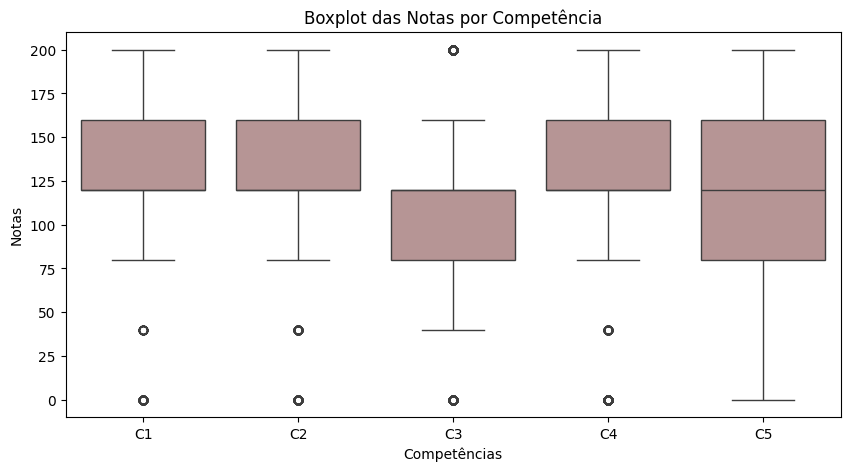

In [ ]:
# Boxplot das notas por competência
plt.figure(figsize=(10, 5))
sns.boxplot(data=essay[['C1', 'C2', 'C3', 'C4', 'C5']], color='#BC8F8F')
plt.ylabel('Notas')
plt.xlabel('Competências')
plt.title('Boxplot das Notas por Competência')
plt.show()

### Análise das notas totais (score)

A análise das notas totais indica que os candidatos apresentam uma média de 614,03 pontos, com desvio padrão de 176,88, que representa uma grande variabilidade.

As notas variam de 0 a 1000, com um percentil de 25% em 520 pontos, mediana de 600 pontos e percentil de 75% em 720 pontos. Embora a média das notas esteja acima de 600, há uma distribuição ampla de resultados, com um número significativo de candidatos obtendo notas mais baixas.

Para complementar a análise, foi gerada uma distribuição da nota total (score) por meio de um histograma com a sobreposição de uma curva de densidade.

In [ ]:
# Análise descritiva das notas por competência
essay[['score']].describe()

,score
count,4570.000000
mean,614.030635
std,176.878132
min,0.000000
25%,520.000000
50%,600.000000
75%,720.000000
max,1000.000000


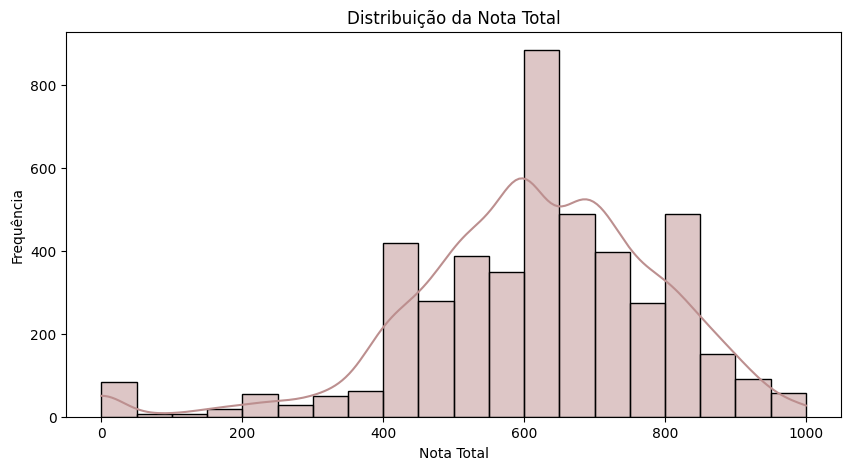

In [ ]:
# Distribuição da nota total (score)
plt.figure(figsize=(10, 5))
sns.histplot(essay['score'], bins=20, kde=True, color='#BC8F8F')
plt.title('Distribuição da Nota Total')
plt.xlabel('Nota Total')
plt.ylabel('Frequência')
plt.show()

### Análise de Correlação entre Competências

Para avaliar as relações entre as competências, foi calculada a matriz de correlação das notas das competências.

Os resultados indicam que há correlações significativas entre as competências. Sendo a maior correlação entre as competências 'Coerência' (C3) (0,77) e  'Coesão' (C4), seguida por 'Tema e Gênero' (C2) e 'Coesão' (C4) (0,77). A competência 'Língua Portuguesa' (C1) e 'Proposta de Intervenção' (C5) também mostram correlações, embora menos significativas.

Esses dados sugerem que as competências estão interligadas, indicando que um bom desempenho em uma competência pode influenciar positivamente o desempenho em outras. A correlação mais baixa observada entre C1 e C5 (0,5356), pode indicar que, embora haja uma relação, ela é menos significativa do que entre outras competências.

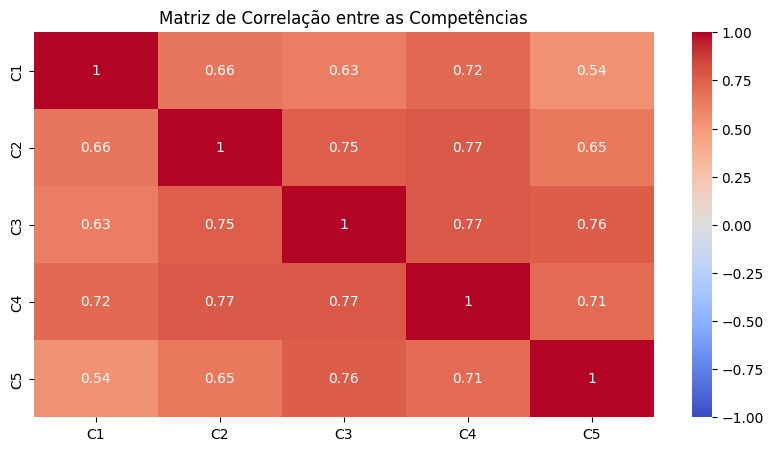

In [ ]:
# Calcular matriz de correlação
competence_corr = essay[['C1', 'C2', 'C3', 'C4', 'C5']].corr()

# Visualizar matriz de correlação
plt.figure(figsize=(10, 5))
sns.heatmap(competence_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlação entre as Competências")
plt.show()


## Análise Textual dos prompts

### Mapeamento Visual de Termos Frequentes

Nesta etapa, foi realizada uma análise textual dos prompts para identificar os termos mais recorrentes nos temas abordados. Inicialmente, foram definidas stopwords em português, incluindo uma lista personalizada de termos comuns nos textos, mas pouco relevantes ao conteúdo. Esse mapeamento textual serve como base para identificar os assuntos de maior destaque e a natureza dos desafios propostos aos candidatos. Na visualização observa-se que os principais temas abordados nos prompts têm ênfase em questões sociais e políticas.

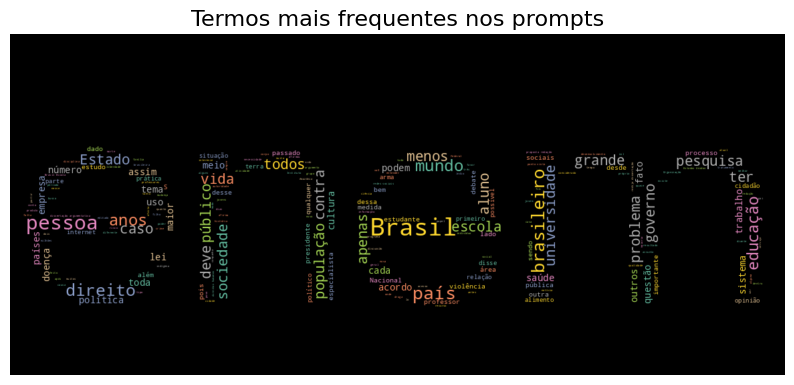

In [ ]:
# Definir stopwords
stop_words = set(stopwords.words('portuguese'))

# Adicionar stopwords personalizadas
stop_words.update(['leia', 'texto', 'íntegra', 'pode', 'fazer', 'diz', 'outro', 'vai', 'dia', 'hoje', 'exemplo', 'sobre', 'ano', 'todo',
                   'forma', 'ainda', 'têm', 'segundo', 'porque', 'folha', 'xa', 'ano', 'são', 'paulo', 'uol'])

# Juntar todas as descrições em um único texto
all_text = ' '.join(prompts['description'])

# Remover caracteres especiais
all_text = re.sub(r'\W+', ' ', all_text)

# Tokenizar o texto e remover stopwords
tokens = word_tokenize(all_text)
filtered_text = ' '.join([word for word in tokens if word.lower() not in stop_words])

# Carregar máscara para a visualização
mask = np.array(Image.open('/content/drive/MyDrive/enem1.png'))

# Gerar nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='black', mask=mask, colormap='Set2').generate(filtered_text)

# Visualizar nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Termos mais frequentes nos prompts", fontsize=16)
plt.show()


### Identificação de temas por prompt

Para identificar temas recorrentes entre os prompts, foi aplicada análise de frequência de palavras associada ao agrupamento temático. Com isso, obteve-se uma contagem de palavras-chave em cada descrição, destacando as dez palavras mais frequentes de cada texto.

A partir dessas palavras mais comuns foi gerada uma matriz de características e, em seguida, aplicou-se o algoritmo K-means para agrupar os prompts em 15 clusters distintos. Cada cluster foi então analisado para identificar os termos predominantes, representando os principais tópicos abordados.

Os 15 temas identificados foram:  
  
0: Justiça e Poder Judiciário no Brasil   
1: Ensino superior e pesquisa no Brasil  
2: Posse de arma de fogo   
3: Saúde no Brasil   
4: Escravidão no Brasil  
5: Redes Sociais   
6: Criminalidade no Brasil    
7: Desmatamento em terras indígenas  
8: Supremo Tribunal Federal    
9: Uso de agrotóxicos   
10: Importância da Pesquisa Científica na Vida dos Brasileiros    
11: Ensino Médio no Brasil  
12: Terceirização de serviços básicos  
13: Patrimônio histórico e cultural    
14: Criptomoedas









In [ ]:
# Inicializar o lematizador
lemmatizer = WordNetLemmatizer()

# Função para contar palavras em um texto
def count_words(text):
    text = re.sub(r'[^\w\s]', ' ', text)  # Remover pontuação
    text = re.sub(r'\d+', '', text)       # Remover números
    text = text.lower()                   # Converter para minúsculas
    tokens = word_tokenize(text)          # Tokenizar o texto
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return Counter(tokens)

# Aplicar a contagem de palavras para cada descrição
prompts['word_counts'] = prompts['description'].apply(count_words)

# Obter as palavras mais comuns em cada texto
prompts['top_words'] = prompts['word_counts'].apply(lambda x: [word for word, _ in x.most_common(10)])

# Visualizar os resultados
prompts.head()


,id,description,word_counts,top_words
0,0,"['No Carnaval de 2020, veio novamente à tona u...","{'carnaval': 8, 'veio': 1, 'novamente': 1, 'to...","[cultura, carnaval, indígenas, índio, fantasia..."
1,1,['O número de pessoas desempregadas no mundo d...,"{'número': 1, 'pessoas': 5, 'desempregadas': 2...","[pessoas, trabalho, desempregadas, deve, aumen..."
2,2,"['Ao longo dos últimos dez anos, o papel do ST...","{'longo': 1, 'últimos': 3, 'dez': 2, 'ano': 3,...","[supremo, stf, tribunal, federal, opinião, púb..."
3,3,"['Com o avanço da biotecnologia, da engenharia...","{'avanço': 2, 'biotecnologia': 1, 'engenharia'...","[humanidade, humanos, seres, avanço, revolução..."
4,4,"['No início deste mês de novembro, o Supremo T...","{'início': 1, 'deste': 1, 'mês': 1, 'novembro'...","[recursos, tribunal, prisão, após, primeiro, j..."


In [ ]:
# Criar uma lista de palavras únicas
unique_words = set(word for words in prompts['top_words'] for word in words)

# Criar matriz de características
vectorizer = CountVectorizer(vocabulary=unique_words, tokenizer=lambda x: x, preprocessor=lambda x: x)
X = vectorizer.fit_transform(prompts['top_words'])

# Aplicar K-means para agrupar os textos
num_clusters = 15
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
prompts['cluster'] = kmeans.fit_predict(X)

# Exibir os tópicos
prompts.head()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,id,description,word_counts,top_words,cluster
0,0,"['No Carnaval de 2020, veio novamente à tona u...","{'carnaval': 8, 'veio': 1, 'novamente': 1, 'to...","[cultura, carnaval, indígenas, índio, fantasia...",5
1,1,['O número de pessoas desempregadas no mundo d...,"{'número': 1, 'pessoas': 5, 'desempregadas': 2...","[pessoas, trabalho, desempregadas, deve, aumen...",5
2,2,"['Ao longo dos últimos dez anos, o papel do ST...","{'longo': 1, 'últimos': 3, 'dez': 2, 'ano': 3,...","[supremo, stf, tribunal, federal, opinião, púb...",8
3,3,"['Com o avanço da biotecnologia, da engenharia...","{'avanço': 2, 'biotecnologia': 1, 'engenharia'...","[humanidade, humanos, seres, avanço, revolução...",9
4,4,"['No início deste mês de novembro, o Supremo T...","{'início': 1, 'deste': 1, 'mês': 1, 'novembro'...","[recursos, tribunal, prisão, após, primeiro, j...",8


In [ ]:
# Identificar o tema de cada cluster
def get_cluster_themes(prompts):
    cluster_themes = {}
    for cluster in prompts['cluster'].unique():
        # Filtrar as descrições que pertencem ao cluster
        cluster_texts = prompts[prompts['cluster'] == cluster]['description']
        # Contar palavras nas descrições do cluster
        all_words = Counter()
        for text in cluster_texts:
            all_words.update(count_words(text))
        # Obter as 5 palavras mais comuns
        common_words = all_words.most_common(5)
        cluster_themes[cluster] = [word for word, _ in common_words]
    return cluster_themes

# Obter temas dos clusters
cluster_themes = get_cluster_themes(prompts)

# Adicionar a coluna de tema no DataFrame
prompts['theme'] = prompts['cluster'].map(lambda x: ', '.join(cluster_themes[x]))

# Exibir os temas de cada cluster
for cluster, themes in cluster_themes.items():
    print(f"Cluster {cluster}: {', '.join(themes)}")

Cluster 5: sociais, social, pessoas, cultura, redes
Cluster 8: federal, liberdade, tribunal, supremo, stf
Cluster 9: agrotóxicos, pesticidas, doenças, produtos, agricultura
Cluster 4: brasil, mundo, escravidão, países, obesidade
Cluster 14: sistema, moeda, criptomoeda, transações, governos
Cluster 1: brasil, educação, direitos, universidade, pesquisa
Cluster 10: pesquisa, vida, brasileiros, importante, pessoas
Cluster 0: direito, foro, ursos, brasil, poder
Cluster 2: armas, arma, fogo, posse, câncer
Cluster 3: brasil, ano, saúde, país, vida
Cluster 13: patrimônio, museu, história, cultura, memória
Cluster 6: presidente, país, crime, brasil, contra
Cluster 12: lei, terceirização, empresas, serviços, água
Cluster 11: educação, ensino, alunos, médio, escola
Cluster 7: terras, índios, brasil, amazônia, desmatamento


### Nota média para cada tema

Nesta etapa, analisou-se a média das notas totais (score) para cada grupo de temas identificado nos prompts. Para isso, os dados de essay foram combinados com os clusters temáticos, permitindo associar cada redação ao tema correspondente e calcular a média de nota para cada tema.

Os clusters foram organizados em ordem crescente de média de notas, o que permite uma análise visual das variações de desempenho médio entre temas. Entretanto, nota-se que a varianção entre as médias é muito pequena, sendo que o tema com menor nota foi 'criminalidade no Brasil' e com maior média o tema 'Terceirização de serviços básicos'.

In [ ]:
# Adicionar coluna 'cluster' do prompts ao essay
essay = essay.merge(prompts[['id', 'cluster']], left_on='prompt', right_on='id', how='left')

# Remover coluna 'id' do DataFrame resultante
essay = essay.drop(columns='id')

# Exibir o DataFrame resultante
essay.head()

,prompt,title,essay,competence,score,C1,C2,C3,C4,C5,cluster
0,21,A greve dos caminhoneiros e a malha ferroviária,['A grande importância dos caminhoneiros para ...,"[160, 160, 120, 120, 120]",680,160,160,120,120,120,6
1,23,"Vossa excelência Senador M. M.,",['O senhor e eu já estamos cientes do projeto ...,"[160, 160, 120, 120, 120]",680,160,160,120,120,120,6
2,39,A validade do impeachment,['É de conhecimento geral dos brasileiros o qu...,"[120, 160, 160, 160, 120]",720,120,160,160,160,120,6
3,26,Podemos perceber que a sociedade brasileira,['Podemos perceber que a sociedade brasileira ...,"[120, 120, 80, 120, 120]",560,120,120,80,120,120,1
4,4,Comenta-se que o ex-presidente Lula,['Comenta-se que o ex presidente Lula ex-presi...,"[0, 0, 0, 0, 0]",0,0,0,0,0,0,8


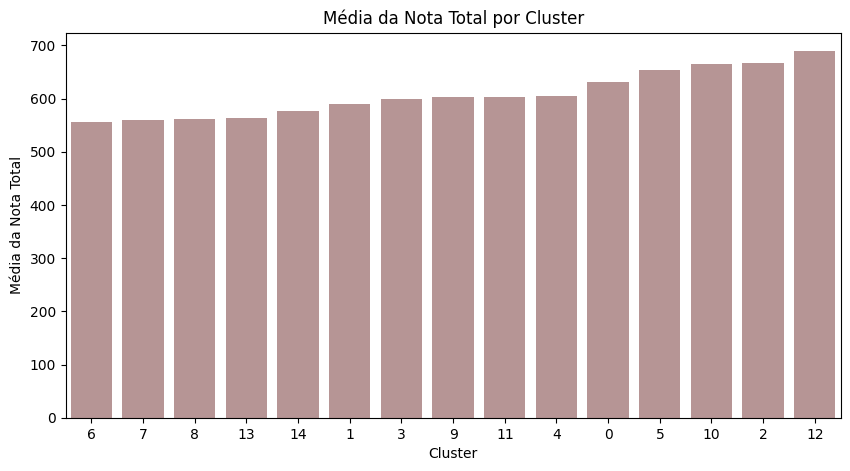

In [ ]:
#Calcular a média dos scores para cada cluster
cluster_scores = essay.groupby('cluster')['score'].mean().reset_index()

# Ordenar o DataFrame pelo score em ordem crescente
cluster_scores = cluster_scores.sort_values(by='score', ascending=True)

# Definir a ordem para o eixo x
order = cluster_scores['cluster'].tolist()

# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(data=cluster_scores, x='cluster', y='score', color='#BC8F8F', order=order)
plt.xlabel('Cluster')
plt.title('Média da Nota Total por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média da Nota Total')
plt.show()

## Análises textuais das redações

### Distribuição de Tamanho de Texto

Para a análise do tamanho dos textos, foi calculado o número de tokens em cada redação, armazenado na coluna 'word_count'. A média do número de tokens é de 288, enquanto a mediana se encontra em 286 tokens por texto.

A relação entre a média de notas e o número de tokens por redação foi explorada por meio de um gráfico de dispersão, que não evidenciou uma correlação significativa entre essas variáveis. No entanto, uma observação interessante é que as redações que alcançaram nota 1000 apresentam consistentemente entre 200 e 600 tokens, sugerindo que a qualidade não está necessariamente ligada à extensão do texto, mas que há uma faixa de tamanho frequente entre as melhores redações.

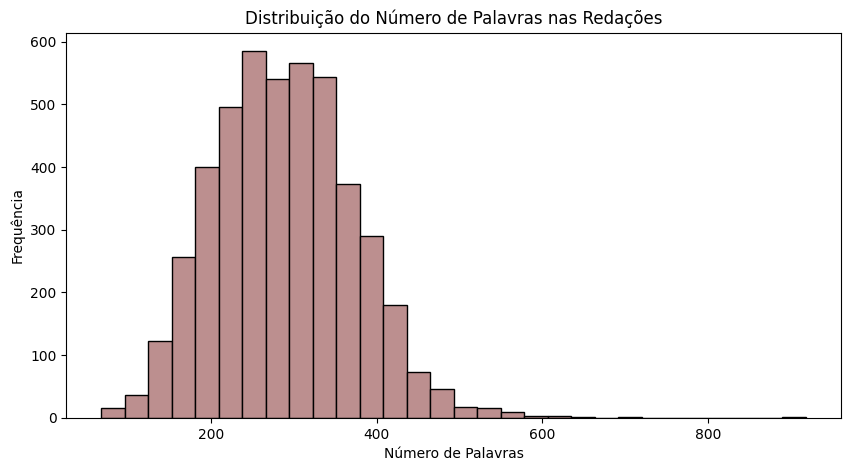

In [ ]:
# Calcular número de palavras para cada redação
essay['word_count'] = essay['essay'].apply(lambda x: len(x.split()))

# Histograma do número de palavras
plt.figure(figsize=(10, 5))
plt.hist(essay['word_count'], bins=30, color='#BC8F8F', edgecolor='black')
plt.title('Distribuição do Número de Palavras nas Redações')
plt.xlabel('Número de Palavras')
plt.ylabel('Frequência')
plt.show()

In [ ]:
essay['word_count'].describe()

,word_count
count,4570.000000
mean,288.486433
std,83.322059
min,68.000000
25%,228.000000
50%,286.000000
75%,344.000000
max,918.000000


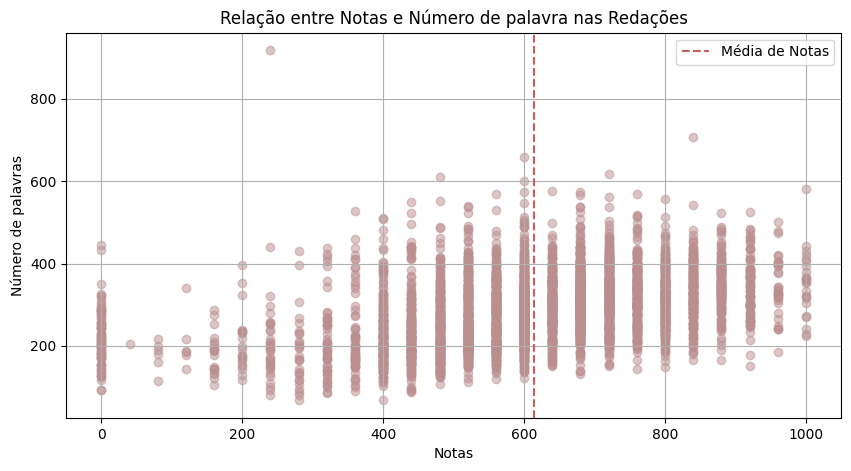

In [ ]:
# Plotar relação entre notas e número de palavras
plt.figure(figsize=(10, 5))
plt.scatter(essay['score'], essay['word_count'], alpha=0.5, color='#BC8F8F')
plt.title('Relação entre Notas e Número de palavra nas Redações')
plt.xlabel('Notas')
plt.ylabel('Número de palavras')
plt.axvline(essay['score'].mean(), color='#CD5C5C', linestyle='--', label='Média de Notas')
plt.legend()
plt.grid()
plt.show()

### Frequência de Palavras Únicas e Vocabulário

Para a análise de vocabulário, foram contabilizadas as palavras únicas em cada redação, desconsiderando as stopwords. O gráfico de distribuição mostra a frequência de palavras únicas nas redações, permitindo uma visão clara sobre a amplitude do vocabulário empregado.

Assim como na análise de extensão dos textos, não há uma relação clara entre o número de palavras únicas e a nota, porém, as redações com notas mais altas tendem a manter um vocabulário único dentro de um intervalo específico, sugerindo que a escolha cuidadosa das palavras pode ter um impacto qualitativo na avaliação final.

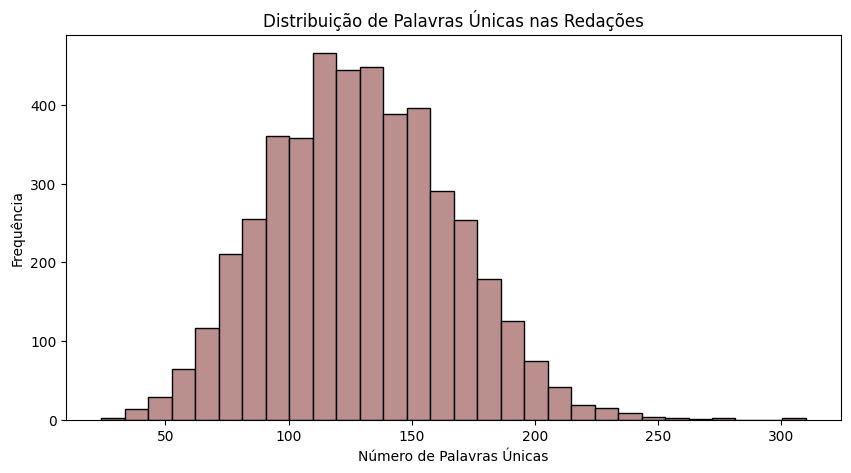

In [ ]:
# Definir stopwords
stop_words = set(stopwords.words('portuguese'))

# Função para contar palavras únicas
def unique_word_count(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return len(set(tokens))

# Aplicar a função
essay['unique_word_count'] = essay['essay'].apply(unique_word_count)

# Distribuição de palavras únicas
plt.figure(figsize=(10, 5))
plt.hist(essay['unique_word_count'], bins=30, color='#BC8F8F', edgecolor='black')
plt.title('Distribuição de Palavras Únicas nas Redações')
plt.xlabel('Número de Palavras Únicas')
plt.ylabel('Frequência')
plt.show()

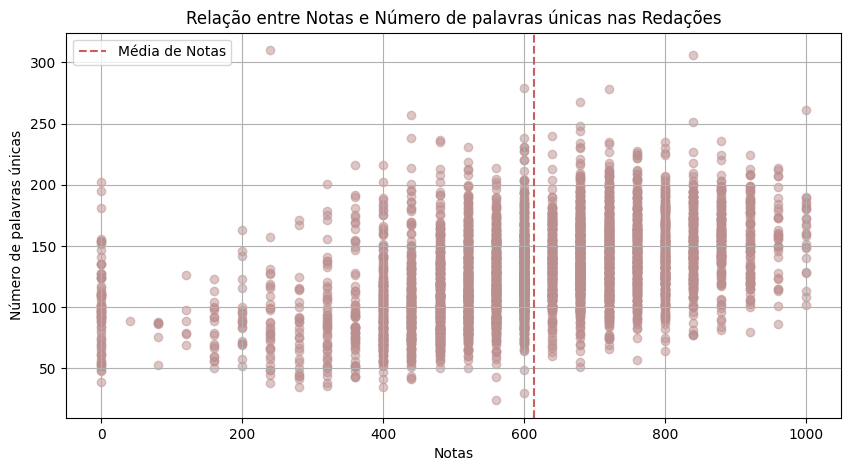

In [ ]:
# Plotar a relação entre notas e número de palavras únicas
plt.figure(figsize=(10, 5))
plt.scatter(essay['score'], essay['unique_word_count'], alpha=0.5, color='#BC8F8F')
plt.title('Relação entre Notas e Número de palavras únicas nas Redações')
plt.xlabel('Notas')
plt.ylabel('Número de palavras únicas')
plt.axvline(essay['score'].mean(), color='#CD5C5C', linestyle='--', label='Média de Notas')
plt.legend()
plt.grid()
plt.show()

### Análise de sentimento

Nesta etapa, foi realizada uma análise de sentimentos das redações, utilizando um valor de polaridade para cada texto, que varia entre -1 (negativo) e 1 (positivo). A análise utilizou uma métrica de sentimentos composta para indicar a natureza emocional dos textos, refletindo se eles são predominantemente positivos, neutros ou negativos.

O gráfico de distribuição mostra a frequência dos escores de sentimentos nas redações, permitindo observar a variação de sentimentos expressos pelos candidatos.

Além disso, a relação entre as notas e os sentimentos foi visualizada em um gráfico de dispersão, que não apresentou uma correlação clara entre a polaridade emocional dos textos e as notas atribuídas.

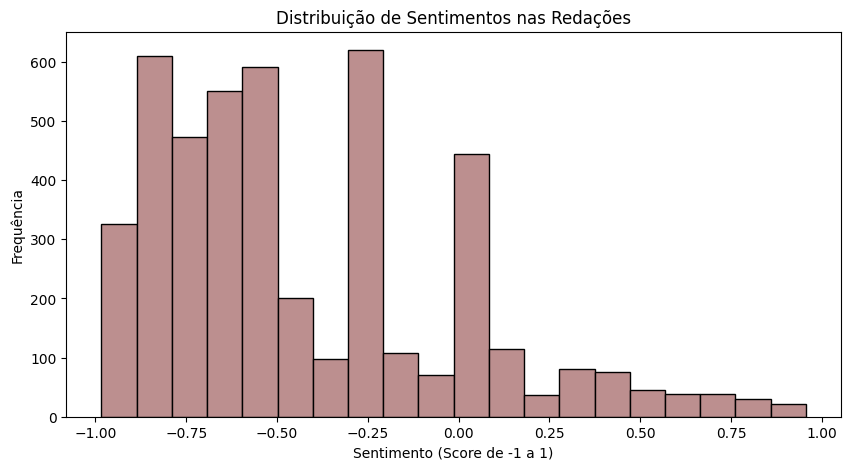

In [ ]:
# Inicializar o analisador de sentimentos
analyzer = SentimentIntensityAnalyzer()

# Função para análise de sentimento
def sentiment_analysis(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

# Aplicar a função nas redações
essay['sentiment'] = essay['essay'].apply(sentiment_analysis)

# Distribuição de sentimentos
plt.figure(figsize=(10, 5))
plt.hist(essay['sentiment'], bins=20 , color='#BC8F8F', edgecolor='black')
plt.title('Distribuição de Sentimentos nas Redações')
plt.xlabel('Sentimento (Score de -1 a 1)')
plt.ylabel('Frequência')
plt.show()


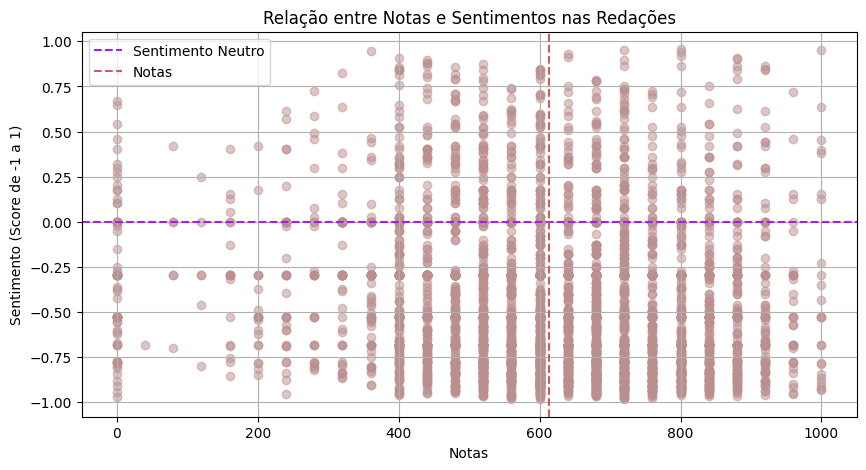

In [ ]:
# Plotar a relação entre notas e sentimentos
plt.figure(figsize=(10, 5))
plt.scatter(essay['score'], essay['sentiment'], alpha=0.5, color='#BC8F8F')
plt.title('Relação entre Notas e Sentimentos nas Redações')
plt.xlabel('Notas')
plt.ylabel('Sentimento (Score de -1 a 1)')
plt.axhline(0, color='#A020F0', linestyle='--', label='Sentimento Neutro')
plt.axvline(essay['score'].mean(), color='#CD5C5C', linestyle='--', label='Notas')
plt.legend()
plt.grid()
plt.show()

## Conclusão  
  
A análise das redações abordou diversos aspectos textuais e quantitativos, incluindo a distribuição e frequência de palavras, vocabulário, temas, sentimento e relação com notas atribuídas. A identificação de temas revelou que as redações frequentemente abordam questões sociais e políticas, refletindo a natureza dos prompts. Embora algumas redações de alta pontuação apresentem uma consistência no tamanho e vocabulário, as análises de dispersão não indicaram uma correlação significativa entre número de palavras, variedade vocabular ou sentimentos e a nota final. Isso sugere que a qualidade dos argumentos e a organização das ideias podem ter mais peso na avaliação do que o volume de palavras ou o tom emocional do texto.

A análise levanta algumas suposições e dúvidas que devem ser levadas em consideração para o desenvolvimento de um sistema de correção automática de redações:  
1. A extensão e frequência de vocabulário, bem como o tom do texto não são suficientes para influenciar as notas, e portanto, a correção deve priorizar a organização e estrutura lógica do texto.
2. Parece existir um intervalo ótimo de número e frequência de palavras associado as notas mais altas. Até que ponto esse fator pode ser relevante?
3. Como estabelecer uma avaliação adequada para coerência e coesão?
4. Como mensurar a qualidade argumentativa e originalidade?

## Próximos Passos e Plano de Solução  
  
1. **Exploração e Pré-processamento do Conjunto de Dados**
  
  Análise inicial  
  Limpeza de texto  
  Tokenização e lematização  
  
  Ferramentas: `pandas`, `nltk`, `spacy`.

2. **Detecção de Desvios Linguísticos**

  Correção Ortográfica e Gramatical: Detectar e contar erros ortográficos.  
  Legibilidade: Implementar métricas como o índice de Flesch para português e analisar sua relação com as competências de coesão e coerência.
  
  Ferramentas: `spacy`, `pyspellchecker`, `textstat`.

3. **Análise do Tema e Estrutura Argumentativa**

  Análise de Tópicos: Treinar um modelo LDA para identificar tópicos comuns e alinhar o texto ao tema proposto.
  Classificação de Alinhamento ao Tema: Identificar desvios em relação aos temas.
  
  Ferramentas: `gensim`, `transformers`, `sklearn`.

4. **Modelo de Atribuição de Nota**

  Dividir o problema em 5 submodelos: Modelar a predição para cada competência separadamente, ajustando as features de entrada e a arquitetura de acordo com o critério de cada competência.
  
  Abordagens de Modelagem:
  Modelo de Regressão para predizer a nota de cada competência (0 a 200).  
  Modelos baseados em Redes Neurais para capturar padrões complexos em texto.

  Ferramentas: `TensorFlow`/`PyTorch`, `sklearn`.

5. **Análise do Modelo e Feedback ao Aluno**

  Feedback resumido: Baseado na nota atribuída e na descrição de proficiência associada a cada faixa de nota, um feedback padrão é devolvido ao usuário.  
  Feedback detalhado: Após a predição, gerar insights que apontem forças e fraquezas do texto.
  Detecção de padrões de desvio específicos: Identificar trechos que resultaram em penalizações e sugerir melhorias.
  
  Ferramentas: `shap`, `nltk`.
